In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'..\datafiles\Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [4]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


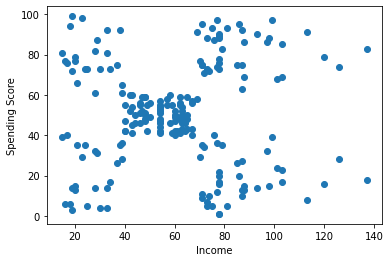

In [5]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

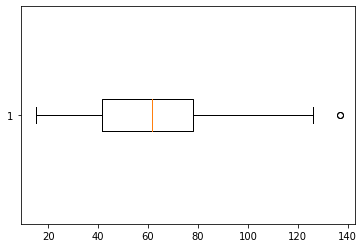

In [7]:
plt.boxplot(df['Annual Income (k$)'], vert=False);

In [10]:
sorted(df['Annual Income (k$)'], reverse = True)

[137,
 137,
 126,
 126,
 120,
 120,
 113,
 113,
 103,
 103,
 103,
 103,
 101,
 101,
 99,
 99,
 98,
 98,
 97,
 97,
 93,
 93,
 88,
 88,
 88,
 88,
 87,
 87,
 87,
 87,
 87,
 87,
 86,
 86,
 85,
 85,
 81,
 81,
 79,
 79,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 77,
 77,
 77,
 77,
 76,
 76,
 75,
 75,
 74,
 74,
 73,
 73,
 73,
 73,
 72,
 72,
 71,
 71,
 71,
 71,
 71,
 71,
 70,
 70,
 69,
 69,
 67,
 67,
 67,
 67,
 65,
 65,
 65,
 65,
 64,
 64,
 63,
 63,
 63,
 63,
 63,
 63,
 62,
 62,
 62,
 62,
 62,
 62,
 61,
 61,
 60,
 60,
 60,
 60,
 60,
 60,
 59,
 59,
 58,
 58,
 57,
 57,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 50,
 50,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 46,
 46,
 46,
 46,
 44,
 44,
 43,
 43,
 43,
 43,
 42,
 42,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 38,
 38,
 37,
 37,
 34,
 34,
 33,
 33,
 33,
 33,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 28,
 25,
 25,
 24,
 24,
 23,
 23,
 21,
 21,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 17,
 17,
 16,
 

In [11]:
mask = df['Annual Income (k$)'] < 137
new_df = df[mask]

In [12]:
new_df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
193,194,113,91
194,195,120,16
195,196,120,79
196,197,126,28


In [13]:
from sklearn.cluster import KMeans

In [15]:
wcss= []
for i in range(1,10):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(new_df.iloc[: , 1:])
    wcss.append(model.inertia_)

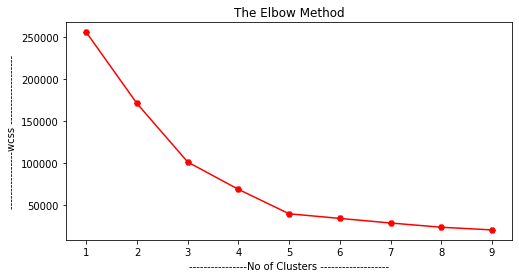

In [50]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10), wcss, marker='H', c='r')
plt.xlabel("----------------No of Clusters -------------------")
plt.ylabel("----------------wcss -------------------")
plt.title("The Elbow Method")
plt.show()

In [51]:
    final_model = KMeans(n_clusters=5, init='k-means++')
    final_model.fit(new_df.iloc[: , 1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
yhat = final_model.predict(new_df.iloc[: , 1:])

In [53]:
len(yhat)

198

In [54]:
yhat

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3])

### Question - Visualise each cluster

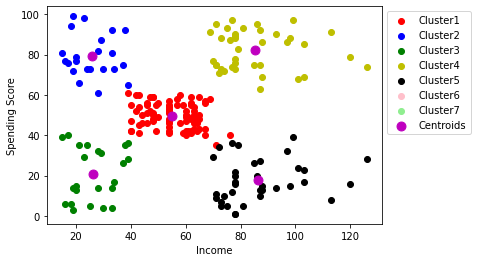

In [55]:
plt.scatter(new_df.iloc[yhat==0,1], new_df.iloc[yhat==0,2], c='r', label='Cluster1')
plt.scatter(new_df.iloc[yhat==1,1], new_df.iloc[yhat==1,2], c='b', label='Cluster2')
plt.scatter(new_df.iloc[yhat==2,1], new_df.iloc[yhat==2,2], c='g', label='Cluster3')
plt.scatter(new_df.iloc[yhat==3,1], new_df.iloc[yhat==3,2], c='y', label='Cluster4')
plt.scatter(new_df.iloc[yhat==4,1], new_df.iloc[yhat==4,2], c='k', label='Cluster5')
plt.scatter(new_df.iloc[yhat==5,1], new_df.iloc[yhat==5,2], c='pink', label='Cluster6')
plt.scatter(new_df.iloc[yhat==6,1], new_df.iloc[yhat==6,2], c='lightgreen', label='Cluster7')
plt.scatter(final_model.cluster_centers_[:,0], final_model.cluster_centers_[:,1]
            , label = 'Centroids', c='m', s=80)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [56]:
final_model.cluster_centers_

array([[55.0875    , 49.7125    ],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [85.21052632, 82.10526316],
       [86.34285714, 17.57142857]])